#Posttest 4
##Nama  : Sahriah
##NIM   : 2109106087
##Kelas : C1'22

Supervised Learning
(variabel X min. 2).

A1. Implementasikan metode:
* Support Vector Classifier (dari SVM), jika menggunakan label Kategorikal pada dataset kalian (Klasifikasi).
* Point Plus: Jika ditambah menggunakan Random Forest/KNN/Naive Bayes/Metode Lainnya beserta penjelasannya pada markdown.
* Linear Regression, jika menggunakan label Numerik pada dataset kalian (Regresi).
* Point Plus: Jika ditambah menggunakan Support Vector Regressor/Metode Lainnya beserta penjelasannya pada markdown.

A2. Hasil prediksi harus dievaluasi masing-masing:
* Klasifikasi: Confusion Matrix (Cek File IPYNB) & Classification Report
* Regresi: MAE, MSE, RMSE, dan R2-Score
* Baik klasifikasi maupun regresi WAJIB ada penjelasannya.

A3. Buat plot untuk hasil prediksi-nya (wajib) se-menarik dan se-informatif mungkin.
* Point Plus: Plot titik-titik hasil prediksi nilai pada target, beserta dengan titik-titik target aslinya.

import librry yang digunakan dan membuat dataframe

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

heart = pd.read_csv('https://raw.githubusercontent.com/sahriahs/Praktikum_KB/refs/heads/master/Posttest_3_KB/heart_posttest3.csv')

In [4]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0,1,0.436620,0,0.295455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,1,3,0.55,0.437811,0,1,0.507042,0,0.431818,1,1
914,0.816327,1,0,0.72,0.320066,1,1,0.570423,0,0.681818,1,1
915,0.591837,1,0,0.65,0.217247,0,1,0.387324,1,0.431818,1,1
916,0.591837,0,1,0.65,0.391376,0,0,0.802817,0,0.295455,1,1


Memisahkan fitur dan label target & Membagi data menjadi data latih dan data uji (80% train, 20% test)

In [5]:
X = heart.drop('HeartDisease', axis=1)
y = heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inisialisasi model SVM

In [6]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)

Melatih model SVM dengan data latih

In [7]:
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Melakukan prediksi pada data uji

In [8]:
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]  # Probabilitas kelas positif

Evaluasi performa model

In [10]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)

Accuracy: 86.96%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        77
           1       0.90      0.87      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



Menunjukkan jumlah prediksi benar dan salah secara terperinci untuk setiap kelas.

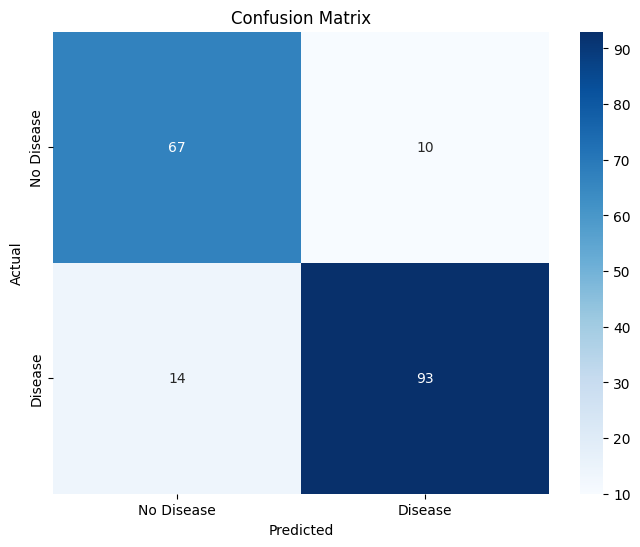

In [11]:
# 1. Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Memberikan visualisasi trade-off antara true positive rate dan false positive rate, dengan AUC (Area Under the Curve) yang memberikan indikasi kinerja model.

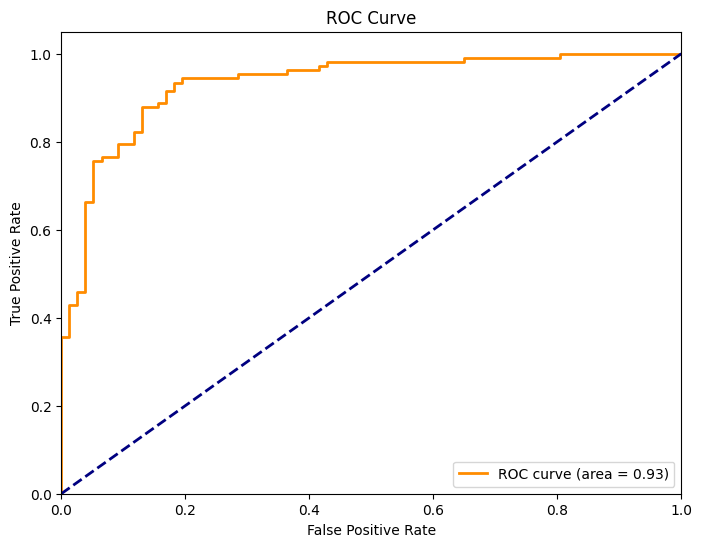

In [12]:
# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

memberikan visualisasi trade-off antara precision dan recall.

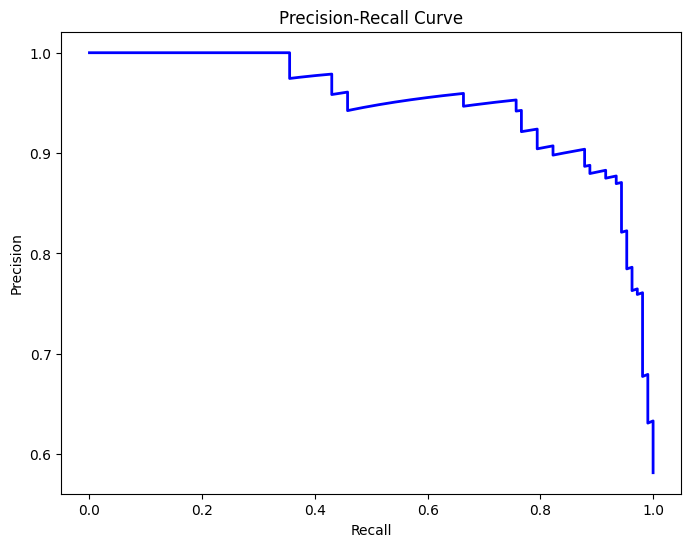

In [13]:
# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

Membandingkan hasil prediksi dengan nilai aktual dalam histogram, untuk menunjukkan perbedaan antara prediksi dan realita.

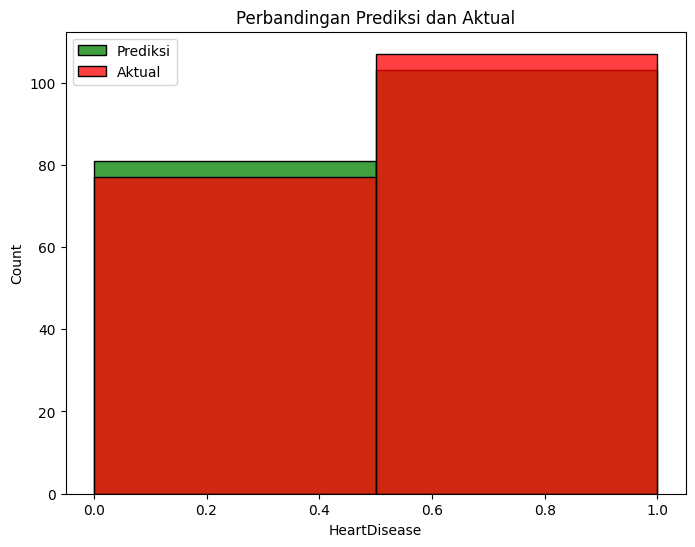

In [15]:
# 4. Histogram hasil prediksi (perbandingan prediksi benar dan salah)
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, color='green', label='Prediksi', bins=2)
sns.histplot(y_test, color='red', label='Aktual', bins=2)
plt.title('Perbandingan Prediksi dan Aktual')
plt.legend()
plt.show()